# This notebook demonstrate how to plot and obtain samples for most commonly used probability distributions.

Recap:

1) A random variable is a variable whose possible values are numerical outcomes of a random phenomenon.

2) There are two types of random variables, discrete and continuous.

3) A discrete random variable is one which may take on only a countable number of distinct values.

4) For example, you can define a random variable X to be the number which comes up when you roll a fair dice.

5) X can take values : [1,2,3,4,5,6] and therefore is a discrete random variable.

6) The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values. 

7) It is also sometimes called the probability function.

8) A continuous random variable is one which takes an infinite number of possible values.

9) For example, you can define a random variable $X$ to be the height of students in a class.

10) Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral).

11) All random variables (discrete and continuous) have a cumulative distribution function.

12)  It is a function giving the probability that the random variable X is less than or equal to x, for every value x.

In [ ]:
# import seaborn for plotting
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(8,5)})
#For plotting
import matplotlib.pyplot as plt
import numpy as np

We can use seaborn distplot to plot observations from a univariate distribution

## Continous distributions
- Uniform
- Normal
- Beta
- Exponential
- Gamma


In [ ]:
from scipy.stats import uniform, beta, expon, norm, gamma

### Uniform distribution
Simplest and useful distribution. The support is defined by the two parameters, a and b, which are its minimum and maximum values. The probability distribution function of the continuous uniform distribution is:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/b701524dbfea89ed90316dbc48c5b62954d7411c>


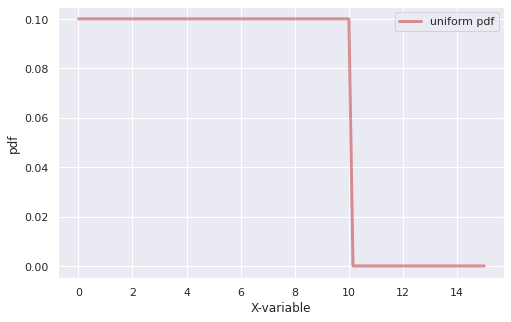

In [ ]:
# For parameters a=0 , b=10 f(x) = 0.1 for a <= x <= b
a=0
b=10
x = np.linspace(0,15, 100)
plt.plot(x, uniform.pdf(x, a, b),'r-', lw=3, alpha=0.6, label='uniform pdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pdf')
plt.show()

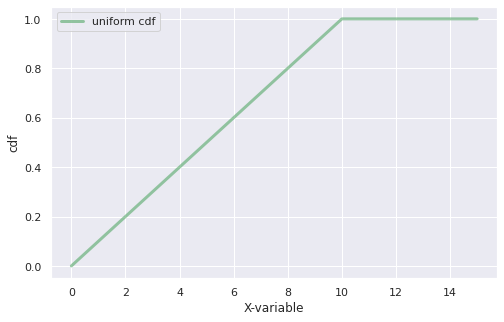

In [ ]:
plt.plot(x, uniform.cdf(x, a, b),'g-', lw=3, alpha=0.6, label='uniform cdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


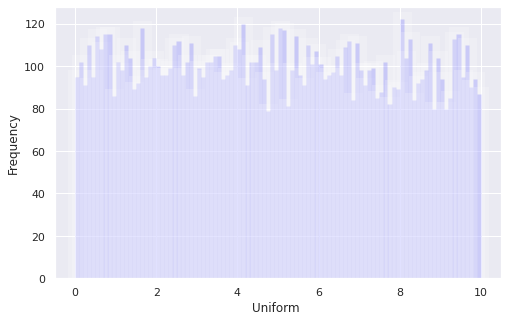

In [ ]:
# Generating 10000 samples and plotting histogram
n = 10000
data_uniform = uniform.rvs(size=n, loc = a, scale=b,random_state = 42)
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Uniform ', ylabel='Frequency')
plt.show()

In [ ]:
#fitting uniform distribution to given data
a_fit,b_fit = uniform.fit(data_uniform)
print(f"actual a and b parameters : {a},{b}")
print(f"fitted a and b parameters : {a_fit},{b_fit}")

actual a and b parameters : 0,10
fitted a and b parameters : 0.00011634755366141114,9.997060385307645


### Normal distribution
A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean.
Its pdf is described as:
<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f>

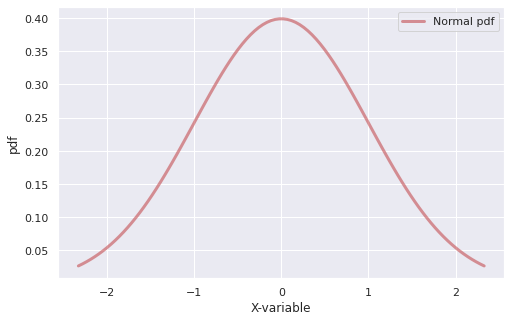

In [ ]:
# For parameters μ=0, σ=1
mu=0
sigma=1
x = np.linspace(norm.ppf(0.01, mu, sigma),norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma),'r-', lw=3, alpha=0.6, label='Normal pdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pdf')
plt.show()

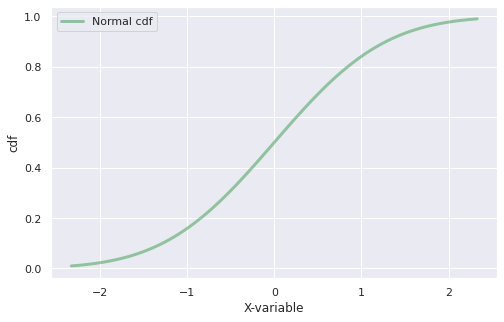

In [ ]:
plt.plot(x, norm.cdf(x, mu, sigma),'g-', lw=3, alpha=0.6, label='Normal cdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

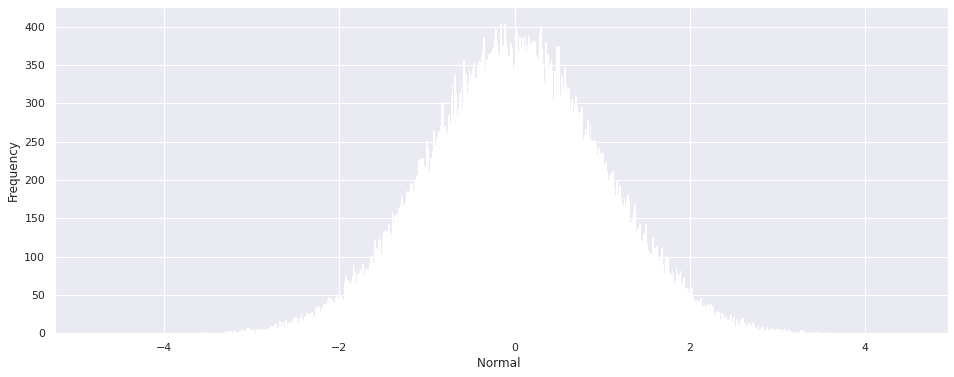

In [ ]:
# Generating 100000 samples and plotting histogram
n = 100000
data_norm = norm.rvs(size=n, loc = 0, scale=1,random_state =3)
fig,ax=plt.subplots(figsize=(16,6))
ax.hist(data_norm,bins=1000)
ax.set(xlabel='Normal ', ylabel='Frequency')
plt.show()

In [ ]:
#fitting normal distribution to data
mu_fit,sigma_fit = norm.fit(data_norm)
print(f"actual mu and sigma parameters : {mu},{sigma}")
print(f"fitted mu and sigma parameters : {mu_fit},{sigma_fit}")


actual mu and sigma parameters : 0,1
fitted mu and sigma parameters : -0.002303755676335325,0.9967058488464684


<function matplotlib.pyplot.show(*args, **kw)>

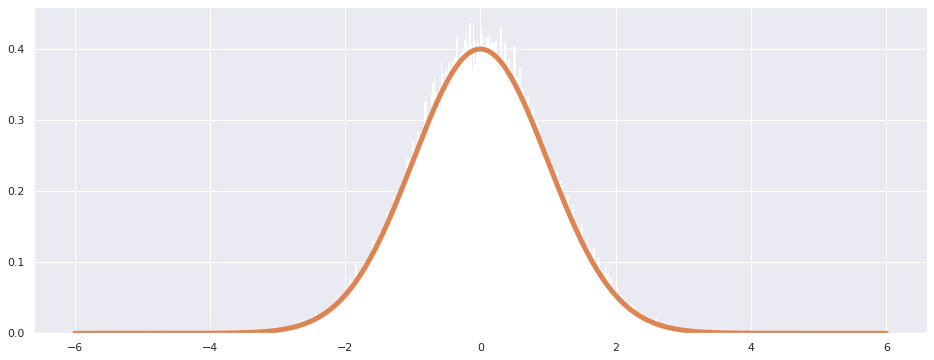

In [ ]:

#data_norm = norm.rvs(size=n, loc = mu, scale=sigma,random_state = 42)
x=np.linspace(-6,6,5000)
fig,ax=plt.subplots(figsize=(16,6))
ax.hist(data_norm,bins=1000,density=True)
ax.plot(x,norm.pdf(x, loc = mu_fit, scale=sigma_fit),lw=5)
plt.show

### Exponential distribution
The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter λ called rate parameter, and its PDF is described as :

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/a693ce9cd1fcd15b0732ff5c5b8040c359cc9332>



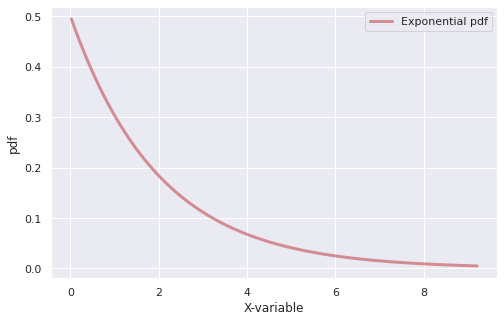

In [ ]:
# For parameters λ = 2
# Scipy expon distribution has shape param scale = 1/lambda and shift param loc
Lambda=2
x = np.linspace(expon.ppf(0.01, loc=0, scale=Lambda),expon.ppf(0.99, loc=0, scale=Lambda), 100)
plt.plot(x, expon.pdf(x, loc=0, scale=Lambda),'r-', lw=3, alpha=0.6, label='Exponential pdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pdf')
plt.show()

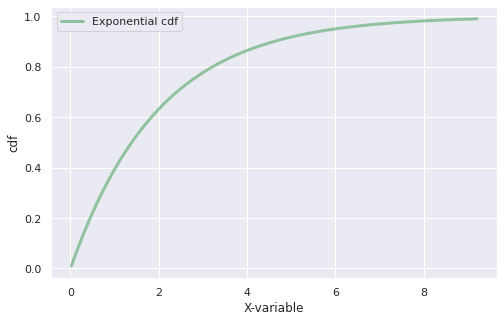

In [ ]:
plt.plot(x, expon.cdf(x, loc=0, scale=Lambda),'g-', lw=3, alpha=0.6, label='Exponential cdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


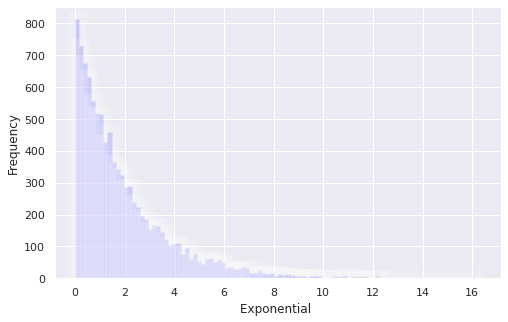

In [ ]:
# Generating 10000 samples and plotting histogram
n = 10000
data_expon = expon.rvs(size=n, loc = 0, scale=Lambda,random_state = 42)
ax = sns.distplot(data_expon,
                  bins=100,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Exponential ', ylabel='Frequency')
plt.show()

In [ ]:
#fitting exponential distribution to data
_,lambda_fit = expon.fit(data_expon)
print(f"actual lambda : {Lambda}")
print(f"fitted lambda : {lambda_fit}")


actual lambda : 2
fitted lambda : 1.9549746397343684


<function matplotlib.pyplot.show(*args, **kw)>

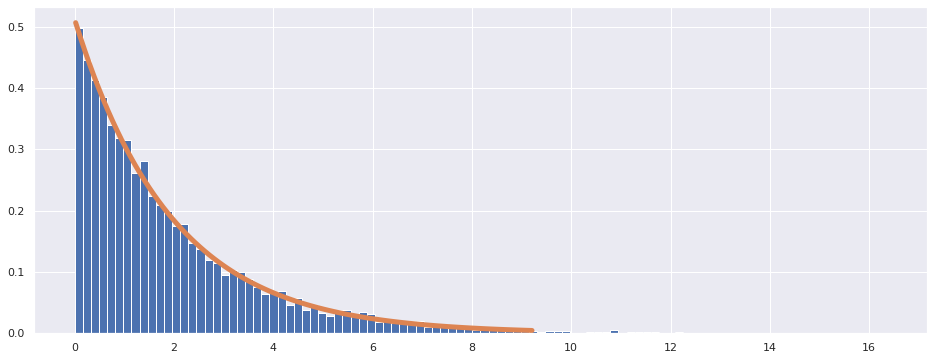

In [ ]:
x = np.linspace(expon.ppf(0.01, loc=0, scale=Lambda),expon.ppf(0.99, loc=0, scale=Lambda), 100)
fig,ax=plt.subplots(figsize=(16,6))
ax.hist(data_expon,bins=100,density=True)
ax.plot(x,expon.pdf(x, loc = 0, scale=lambda_fit),lw=5)
plt.show

### Beta distribution
Beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution. Its pdf is descibed as:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/125fdaa41844a8703d1a8610ac00fbf3edacc8e7>
<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/b32815268d9d70b0b9fbb8fd5a25be7bc640aa50>
Where Γ(n) is the gamma function and is defined as (n−1)!.


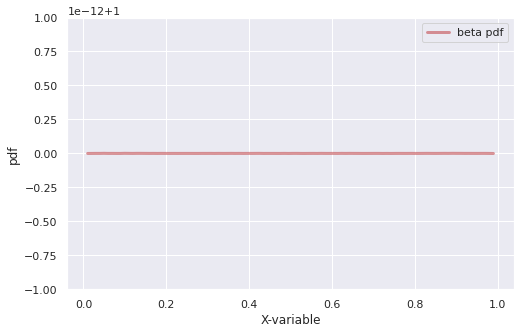

In [ ]:
# With a=1 , b=1 Beta distribution looks like a uniform distribution.
a=1
b=1
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=3, alpha=0.6, label='beta pdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pdf')
plt.show()

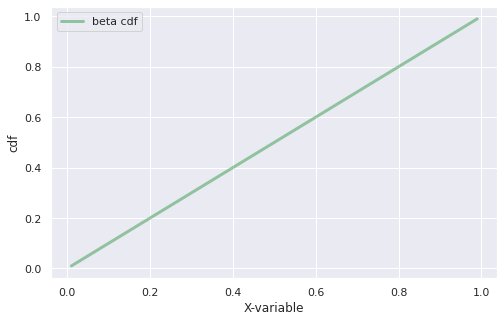

In [ ]:
plt.plot(x, beta.cdf(x, a, b),'g-', lw=3, alpha=0.6, label='beta cdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


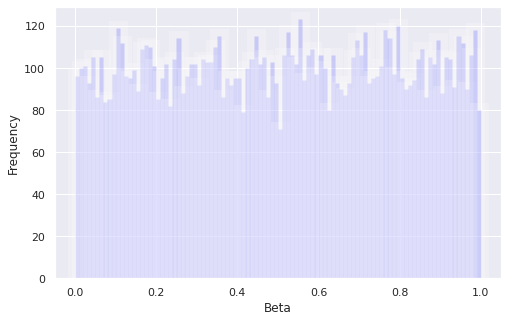

In [ ]:
# Let us generate 10000, random numbers from Beta distribution.
#The histogram of Beta(1,1) is a uniform distribution.
data_beta = beta.rvs(a, b, size=10000,random_state = 42)
ax = sns.distplot(data_beta,
                  kde=False,
                  bins=100,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Beta', ylabel='Frequency')
plt.show()

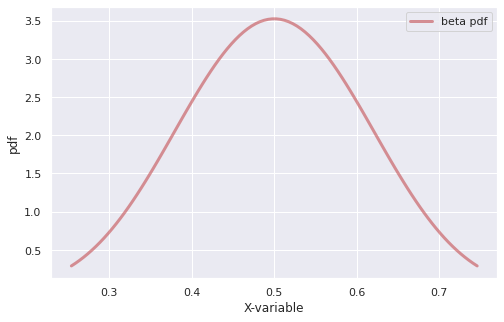

In [ ]:
# With a=10 , b=10 Beta distribution looks like a normal distribution.
a=10
b=10
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=3, alpha=0.6, label='beta pdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pdf')
plt.show()

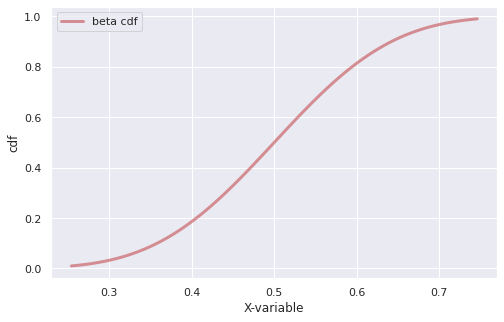

In [ ]:
plt.plot(x, beta.cdf(x, a, b),'r-', lw=3, alpha=0.6, label='beta cdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


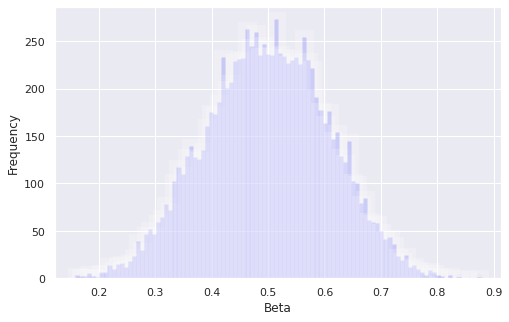

In [ ]:
# Let us generate 10000, random numbers from Beta distribution.
# The histogram of Beta(10,10) is a normal distribution.
data_beta = beta.rvs(a, b, size=10000,random_state = 42)
ax = sns.distplot(data_beta,
                  kde=False,
                  bins=100,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Beta', ylabel='Frequency')
plt.show()

Try plotting histograms with different values of a and b to see beta distribution taking different forms.

In [ ]:
#fit beta distribution to data generated using a=b=10
# write your code here
a1,b1,loc1,scale1 = beta.fit(data_beta)
print(f"fitted alpha : {a1}")
print(f"fitted beta : {b1}")
print(f"loc : {loc1}")
print(f"scale : {scale1}")

fitted alpha : 9.146392200712828
fitted beta : 8.551425730437387
loc : 0.012318289332077735
scale : 0.940469126410479


### Gamma distribution
The gamma distribution is a two-parameter family of continuous probability distributions. While it is used rarely in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution. 

The gamma distribution can be parameterized in terms of a shape parameter α=k and an inverse scale parameter β=1/θ, called a rate parameter.

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/a330427b13e76a6b588aea8c396774d61bf2a222>

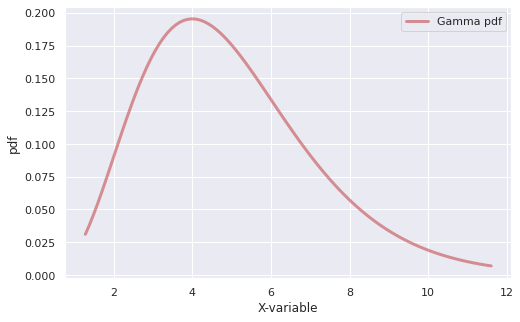

In [ ]:
# Scipy gamma distribution has shape param a = alpha and has scale and shift param scale and loc
# When a is an integer, gamma reduces to the Erlang distribution, and when a=1 to the exponential distribution.

# For parameter alpha = 5
alpha=5
x = np.linspace(gamma.ppf(0.01, a=alpha),gamma.ppf(0.99, a=alpha), 100)
plt.plot(x, gamma.pdf(x, a=alpha),'r-', lw=3, alpha=0.6, label='Gamma pdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pdf')
plt.show()

Text(0, 0.5, 'cdf')

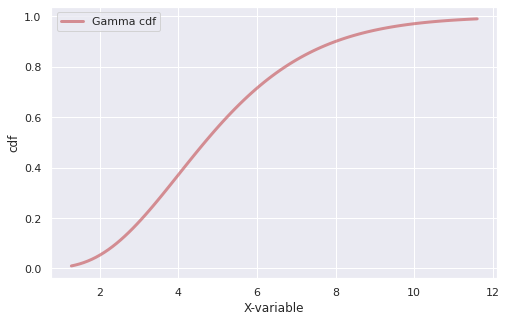

In [ ]:
plt.plot(x, gamma.cdf(x, a=alpha),'r-', lw=3, alpha=0.6, label='Gamma cdf')
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


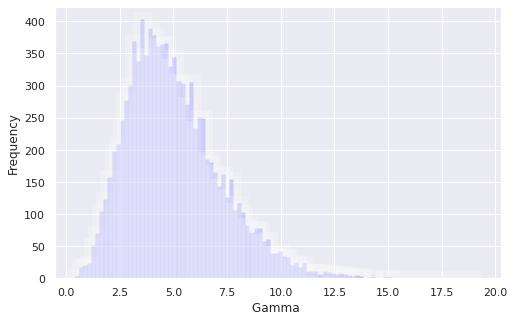

In [ ]:
# Generating 10000 samples and plotting histogram
n = 10000
data_gamma = gamma.rvs(size=n, a=alpha,random_state = 42)
ax = sns.distplot(data_gamma,
                  bins=100,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Gamma ', ylabel='Frequency')
plt.show()

In [ ]:
#fit gama distribution to data generated above
# write your code here

## Discrete distributions
- Bernoulli
- Binomial
- Poisson
- Geometric

In [ ]:
from scipy.stats import bernoulli, binom, nbinom, poisson, geom

### Bernoulli distribution
It is the discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability q=1-p.
Probability mass function over possible outcomes k, is defined as:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/5fff3412509e73816dc2b28405b93c34f89ee487>

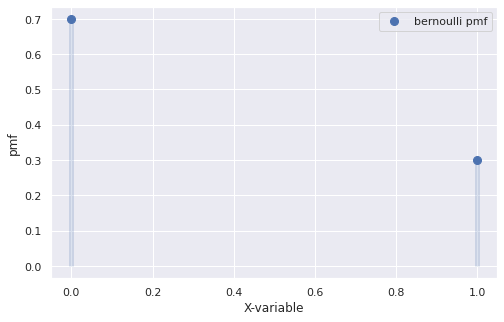

In [ ]:
# For parameter p= 0.3
p=0.3
x = np.arange(bernoulli.ppf(0.01, p),bernoulli.ppf(0.99, p)+1)
plt.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
plt.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.2)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pmf')
plt.show()

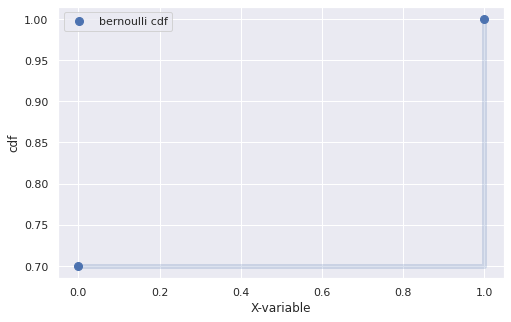

In [ ]:
plt.plot(x, bernoulli.cdf(x, p), 'bo', ms=8, label='bernoulli cdf')
plt.plot(x,  bernoulli.cdf(x, p),'b-', drawstyle='steps-post', lw=5, alpha=0.2)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli ')]

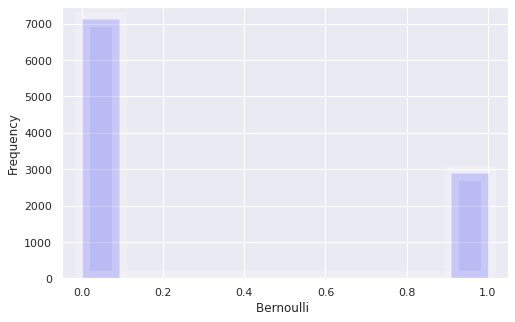

In [ ]:
# Generating 10000 samples and plotting histogram
n = 10000
data_bernoulli = bernoulli.rvs(p,size=n,random_state = 42)
ax = sns.distplot(data_bernoulli,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Bernoulli ', ylabel='Frequency')

In [ ]:
#fit bernoulli distribution to data
p_fit = data_bernoulli.mean()
print(f"actual p : {p}")
print(f"fitted p : {p_fit}")

actual p : 0.3
fitted p : 0.2887


### Binomial distribution
It can be used to model the number of successes from N independent Bernoulli trials. The probability of getting exactly k successes in n trials with succes probability p for each bernoulli trial, is given by the probability mass function:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/b872c2c7bfaa26b16e8a82beaf72061b48daaf8e>

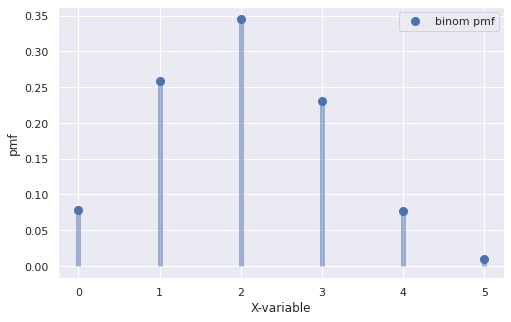

In [ ]:
# For parameter p= 0.4 n=5
p=0.4
n=5
x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p)+1)
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pmf')
plt.show()

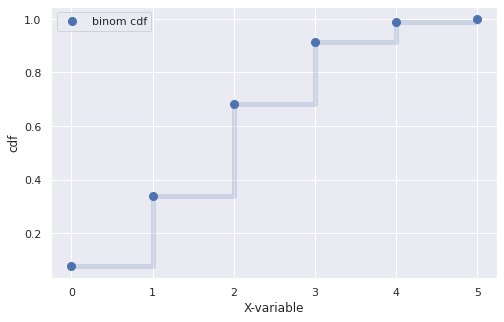

In [ ]:
plt.plot(x, binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
plt.plot(x,  binom.cdf(x, n, p),'b-', drawstyle='steps-post', lw=5, alpha=0.2)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


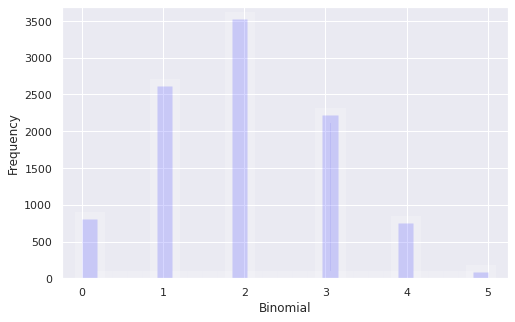

In [ ]:
# Generating 10000 samples and plotting histogram
data_binom = binom.rvs(n,p,size=10000,random_state = 42)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Binomial', ylabel='Frequency')
plt.show()

In [ ]:
#fit binom distribution to data

#since mean of binomial distribution = np
p_fit = data_binom.mean()/n
print(f"actual p : {p}")
print(f"fitted p : {p_fit}")

actual p : 0.4
fitted p : 0.3955


### Poisson distribution
It expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

The probability of observing k events in an interval is given by the equation:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/df3b6a7648b33ca3a987b970e4e8a719f888edb5>
Where

- λ is the average number of events per interval (rate parameter).
- k takes values 0, 1, 2, …

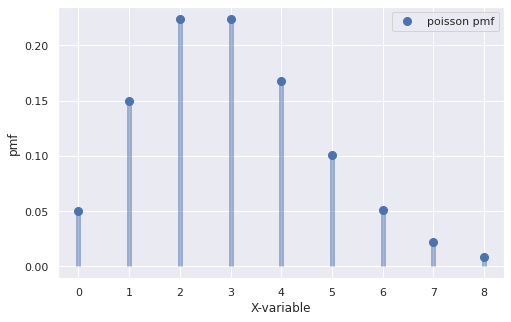

In [ ]:
# scipy poisson takes mu = λ as shape parameter and loc as shift parameter.
# For parameter λ= 3
Lambda = 3
x = np.arange(poisson.ppf(0.01, mu=Lambda),poisson.ppf(0.99, mu=Lambda)+1)
plt.plot(x, poisson.pmf(x, mu=Lambda), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu=Lambda), colors='b', lw=5, alpha=0.5)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pmf')
plt.show()

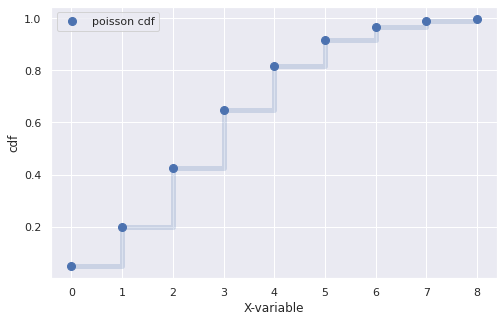

In [ ]:
plt.plot(x, poisson.cdf(x, mu=Lambda), 'bo', ms=8, label='poisson cdf')
plt.plot(x,  poisson.cdf(x, mu=Lambda),'b-', drawstyle='steps-post', lw=5, alpha=0.2)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson')]

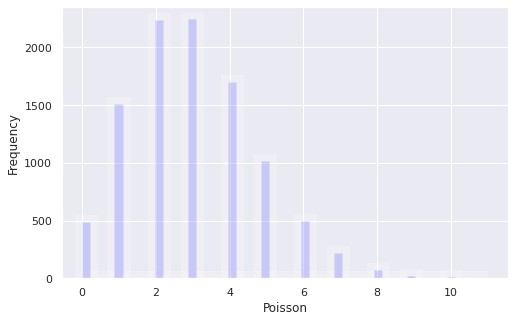

In [ ]:
# Generating 10000 samples and plotting histogram
data_poisson = poisson.rvs(mu=Lambda,size=10000,random_state = 42)
ax = sns.distplot(data_poisson,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Poisson', ylabel='Frequency')

In [ ]:
#fit poisson distribution to data

#since mean of poisson distribution = lambda
lambda_fit = data_poisson.mean()
print(f"actual lambda : {Lambda}")
print(f"fitted lambda : {lambda_fit}")

actual lambda : 3
fitted lambda : 2.9946


### Geometric distribution
The geometric distribution gives the probability that the first occurrence of success requires k independent trials, each with success probability p. If the probability of success on each trial is p, then the probability that the kth trial (out of k trials) is the first success is

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/0dcd47653aadb93e0eed01c13ce52819e5ef6c89>
for k = 1, 2, 3, ....

The following form of the geometric distribution is used for modeling the number of failures until the first success:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/7643eaa241e05bbb8a9da6ddaf3004dadff47fac>
for k = 0, 1, 2, 3, ....

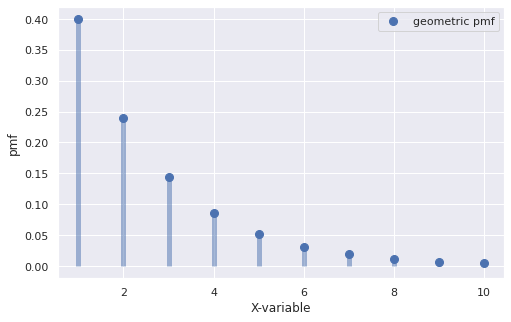

In [ ]:
# scipy geom takes p as shape parameter and loc as shift parameter.
# For parameter p= 0.4
p=0.4
x = np.arange(geom.ppf(0.01, p),geom.ppf(0.99, p)+1)
plt.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geometric pmf')
plt.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('pmf')
plt.show()

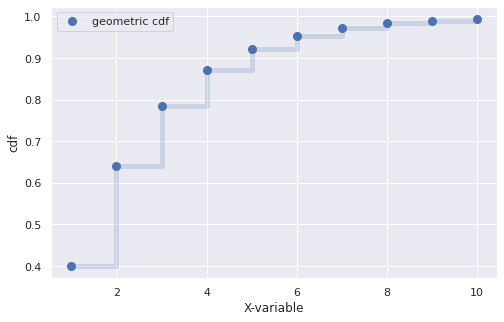

In [ ]:
plt.plot(x, geom.cdf(x, p), 'bo', ms=8, label='geometric cdf')
plt.plot(x,   geom.cdf(x, p),'b-', drawstyle='steps-post', lw=5, alpha=0.2)
plt.legend()
plt.xlabel('X-variable')
plt.ylabel('cdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


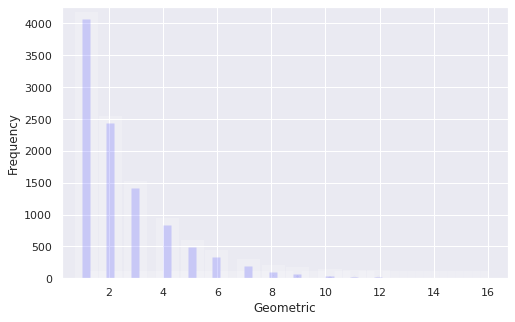

In [ ]:
# Generating 10000 samples and plotting histogram
data_geom = geom.rvs(p,size=10000,random_state = 42)
ax = sns.distplot(data_geom,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.2})
ax.set(xlabel='Geometric', ylabel='Frequency')
plt.show()

In [ ]:
#fit geometric distribution to above generated data

#write your code here

#mean of geometric distribution = 1/p
